# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [76]:
# import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

* ### Read data from ‘.csv’ file

In [77]:
# read data from '.csv' file
dataset = pd.read_csv("winequality.csv")

## Part 2: Exploratory Data Analysis.

* ### Info

In [78]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [79]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [80]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [81]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
dataset.quality = dataset.quality.apply(lambda x: 0 if x <= 6 else 1)

In [82]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [83]:
print(f"Not good wine {round(dataset.quality.value_counts()[0] / len(dataset) * 100, 2)} % of the dataset")
print(f"Not good wine {round(dataset.quality.value_counts()[1] / len(dataset) * 100, 2)} % of the dataset")

dataset.quality.value_counts()

Not good wine 78.36 % of the dataset
Not good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

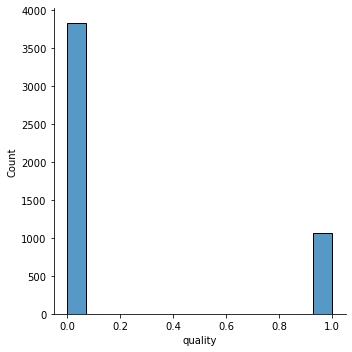

In [84]:
# visualisation plot
sns.displot(data=dataset.quality)
#видно, что датасет несбалансированный

* ### Resampling of an imbalanced dataset

In [85]:
# class count
count_class_0, count_class_1 = dataset.quality.value_counts()

# divide by class
class_0 = dataset[dataset['quality'] == 0]
class_1 = dataset[dataset['quality'] == 1]

* ### Random under-sampling of an imbalanced dataset

* ### Random over-sampling of an imbalanced dataset

Random over-sampling:
0    3838
1    3838
Name: quality, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

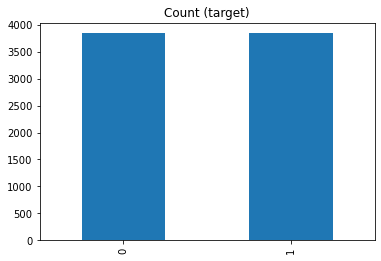

In [86]:
class_1_over = class_1.sample(count_class_0, replace=True)
dataset_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(dataset_over.quality.value_counts())

dataset_over.quality.value_counts().plot(kind='bar', title='Count (target)')

* ### Initialisation of target

In [87]:
#target = dataset.quality

target_over = dataset_over["quality"]

* ### Drop column 'quality'

In [88]:
#dataset = dataset.drop(["quality"], axis=1)
dataset_over = dataset_over.drop(columns=["quality"])

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [89]:
# StandardScaler, чтобы значения были в одном масштабе
sc = StandardScaler()

#dataset_sc = sc.fit_transform(dataset)

dataset_sc = sc.fit_transform(dataset_over)

dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.244424,-0.035676,0.270307,3.029200,0.099438,0.631150,0.911623,2.505795,-1.300149,-0.355523,-1.551912
1,-0.611840,0.268433,0.085224,-0.909396,0.309824,-1.319216,-0.046715,0.180243,0.649338,-0.029595,-1.017844
2,1.589981,0.065694,0.640473,0.183513,0.362421,-0.312575,-0.929394,0.545687,0.389406,-0.437005,-0.560071
3,0.489070,-0.441155,-0.099860,0.513448,0.783194,0.756980,1.315134,0.711798,-0.065474,-0.762933,-0.712662
4,0.489070,-0.441155,-0.099860,0.513448,0.783194,0.756980,1.315134,0.711798,-0.065474,-0.762933,-0.712662


* ### Creating datasets for ML part

In [91]:
# set 'X' for features' and y' for the target ('quality').
# y = target
# X = dataset_sc.copy()

# for under-sampling dataset 


# for over-sampling dataset 
y = target_over
X = dataset_sc.copy()

In [92]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.244424,-0.035676,0.270307,3.029200,0.099438,0.631150,0.911623,2.505795,-1.300149,-0.355523,-1.551912
1,-0.611840,0.268433,0.085224,-0.909396,0.309824,-1.319216,-0.046715,0.180243,0.649338,-0.029595,-1.017844
2,1.589981,0.065694,0.640473,0.183513,0.362421,-0.312575,-0.929394,0.545687,0.389406,-0.437005,-0.560071
3,0.489070,-0.441155,-0.099860,0.513448,0.783194,0.756980,1.315134,0.711798,-0.065474,-0.762933,-0.712662
4,0.489070,-0.441155,-0.099860,0.513448,0.783194,0.756980,1.315134,0.711798,-0.065474,-0.762933,-0.712662


* ### 'Train\Test' split

In [93]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [95]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [96]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [97]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.718539  0.693211  0.705648       766
           1   0.705144  0.729870  0.717294       770

    accuracy                       0.711589      1536
   macro avg   0.711841  0.711541  0.711471      1536
weighted avg   0.711824  0.711589  0.711486      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.927419  0.750653  0.829726       766
           1   0.791485  0.941558  0.860024       770

    accuracy                       0.846354      1536
   macro avg   0.859452  0.846106  0.844875      1536
weighted avg   0.859275  0.846354  0.844914      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.971469  0.889034  0.928425       766
           1   0.898204  0.974026  0.934579       770

    accuracy                       0.931641      1536
   macro avg   0.934836  0.931530  0.931502

* ### Confusion matrix

In [98]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print(f"LR Confusuion Matrix: \n {LR_confusion_mx}")
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print(f"KNN Confusuion Matrix: \n {KNN_confusion_mx}")
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print(f"DT Confusuion Matrix: \n {DT_confusion_mx}")
print()

LR Confusuion Matrix: 
 [[531 235]
 [208 562]]

KNN Confusuion Matrix: 
 [[575 191]
 [ 45 725]]

DT Confusuion Matrix: 
 [[681  85]
 [ 20 750]]



* ### ROC-AUC score

In [99]:
roc_auc_score(DT_pred, y_test)

0.9348364611718076

* ### Build, train and evaluate models with hyperparameters

In [100]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "penalty": ["l1", "l2", "elasticnet", "none"], "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
LR1 = GridSearchCV(LR, param_grid=LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {"n_neighbors": [5, 7, 9, 11]}
KNN1 = GridSearchCV(KNN, param_grid=KNN_params)
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {"max_depth": [2, 5, 7, 9, 10, 15, 20], "criterion": ["gini", "entropy"], "random_state": [0]}
DT1 = GridSearchCV(DT, param_grid=DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [101]:
# print the best hyper parameters set
print(f"Logistic Regression Best Hyper Parameters: {LR1.best_params_}")
print(f"K-Nearest Neighbour Best Hyper Parameters: {KNN1.best_params_}")
print(f"Decision Tree Best Hyper Parameters: {DT1.best_params_}")

Logistic Regression Best Hyper Parameters: {'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}
K-Nearest Neighbour Best Hyper Parameters: {'n_neighbors': 5}
Decision Tree Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [102]:
print(f"LR Classification Report \n {classification_report(y_test, LR1_pred, digits=6)}")
print(f"KNN Classification Report \n {classification_report(y_test, KNN1_pred, digits=6)}")
print(f"DT Classification Report \n {classification_report(y_test, DT1_pred, digits=6)}")

LR Classification Report 
               precision    recall  f1-score   support

           0   0.721467  0.693211  0.707057       766
           1   0.706250  0.733766  0.719745       770

    accuracy                       0.713542      1536
   macro avg   0.713859  0.713489  0.713401      1536
weighted avg   0.713839  0.713542  0.713418      1536

KNN Classification Report 
               precision    recall  f1-score   support

           0   0.927419  0.750653  0.829726       766
           1   0.791485  0.941558  0.860024       770

    accuracy                       0.846354      1536
   macro avg   0.859452  0.846106  0.844875      1536
weighted avg   0.859275  0.846354  0.844914      1536

DT Classification Report 
               precision    recall  f1-score   support

           0   0.972622  0.881201  0.924658       766
           1   0.891924  0.975325  0.931762       770

    accuracy                       0.928385      1536
   macro avg   0.932273  0.928263  0.928210   

* ### Confusion matrix

DT Confusion Matrix


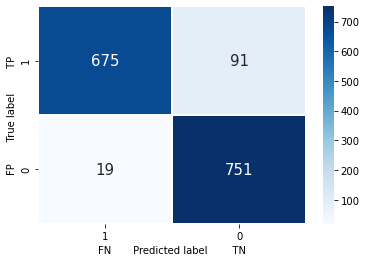

In [103]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [104]:
roc_auc_score(DT1_pred, y_test)

0.9322732344424898

##  Conclusion.

In [105]:
# # submission of .csv file with predictions
# sub = pd.DataFrame()
# sub['ID'] = X_test.index
# sub['quality'] = DT1_pred
# sub.to_csv('WinePredictionsTest.csv', index=False)